In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
def get_hex(number: float | int):
    if type(number) == int:
        return f'{number:x}'
    point_position: int = str(number).find(".")
    return f'{int(str(number)[0:point_position]):x}.{int(str(number)[point_position + 1:]):x}'

### Целевая функция

In [12]:
# Определение целевой функции
class TargetFunction:
    def __init__(self, name: str, middle_name: str, surname: str):
        self.a_1: float = len(name) / 10
        self.a_2: float = len(middle_name) / 10
        self.a_3: float = len(surname) / 10
        self.A: float = len(name) + len(middle_name) + len(surname)
        self.calculations_count: int = 0
        self.derivative_calculations_count: int = 0
        self.second_derivative_calculations_count: int = 0
        
    def calculate(self, x: float) -> float:
        self.calculations_count += 1
        return np.exp(self.a_1 * x) + np.exp(self.a_2 * x) + np.exp(self.a_3 * x) - self.A * np.sin(x)

    def get_calculations_count(self) -> int:
        return self.calculations_count

    def flush_calculations_count(self) -> str:
        self.calculations_count = 0
        return 'Calculations count flush - Success'

    def calculate_derivative(self, x):
        self.derivative_calculations_count += 1
        return self.a_1 * np.exp(self.a_1 * x) + self.a_2 * np.exp(self.a_2 * x) + self.a_3 * np.exp(self.a_3 * x) - self.A * np.cos(x)

    def get_derivative_calculations_count(self) -> int:
        return self.derivative_calculations_count

    def flush_derivative_calculations_count(self) -> str:
        self.derivative_calculations_count = 0
        return 'Derivative calculations count flush - Success'

    def calculate_second_derivative(self, x):
        self.second_derivative_calculations_count += 1
        return self.a_1 * self.a_1 * np.exp(self.a_1 * x) + self.a_2 * self.a_2 * np.exp(self.a_2 * x) + self.a_3 * self.a_3 * np.exp(self.a_3 * x) + self.A * np.sin(x)

    def get_second_derivative_calculations_count(self) -> int:
        return self.second_derivative_calculations_count

    def flush_second_derivative_calculations_count(self) -> str:
        self.second_derivative_calculations_count = 0
        return 'Second derivative calculations count flush - Success'

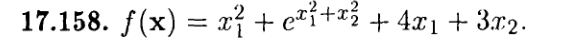

In [50]:
class NewVectorTargetFunction(TargetFunction):
    def __init__(self):
        self.calculations_count: int = 0
        self.gradient_calculations_count: int = 0
        self.derivative_calculations_count: int = 0
        self.second_derivative_calculations_count: int = 0
        
    def calculate(self, x: np.array) -> float:
        self.calculations_count += 1
        return x[0] ** 2 + np.exp(x[0] ** 2 + x[1] ** 2) + 4 * x[0] + 3 * x[1]

    def calculate_gradient(self, x: np.array) -> np.array:
        self.gradient_calculations_count += 1
        return np.array([
            2 * x[0] + 2 * x[0] * np.exp(x[0] ** 2 + x[1] ** 2) + 4,
            2 * x[1] * np.exp(x[0] ** 2 + x[1] ** 2) + 3
        ])

    def flush_gradient_calculations_count(self):
        self.gradient_calculations_count = 0
        return 'Gradient count flush - Success'

### Поиск минимума методом градиентного спуска

In [51]:
def gradient_descent(
    func: TargetFunction, 
    start_point: np.array = np.array([0, 0]), 
    step_size: float = 0.01, 
    stop_factor: float = 0.001,
    max_iter_count: int = 1000,
    history: pd.DataFrame = pd.DataFrame(columns=['x', 'f(x)', 'Вычисления f(x)', 'grad(f(x))', 'Вычисления grad(f(x))'])
    ) -> (np.array, float, pd.DataFrame):

    # Итерируемся
    for _ in range(max_iter_count):
        grad: np.array =  func.calculate_gradient(start_point)
        if abs(np.linalg.norm(grad, np.inf)) < stop_factor:
            break
        else:
            start_point = start_point - grad * step_size
            history.loc[len(history)] = (
                start_point, 
                func.calculate(start_point), 
                func.calculations_count,
                grad,
                func.gradient_calculations_count
            )
    
    return np.round(start_point, 5), np.round(func.calculate(start_point), 5), history

In [52]:
my_func: NewVectorTargetFunction = NewVectorTargetFunction()

In [53]:
my_func.flush_calculations_count()

'Calculations count flush - Success'

In [54]:
my_func.flush_gradient_calculations_count()

'Gradient count flush - Success'

In [55]:
min_x, min_value, minimizer_history = gradient_descent(my_func, stop_factor = 10 ** -3)

print(f'(Точка минимума, Минимальное значение) : ({min_x}, {min_value}) \n Количество вычислений градиента функции : {my_func.gradient_calculations_count}')

minimizer_history

(Точка минимума, Минимальное значение) : ([-0.61338 -0.66311], -1.80529) 
 Количество вычислений градиента функции : 131


,x,f(x),Вычисления f(x),grad(f(x)),Вычисления grad(f(x))
0,"[-0.04, -0.03]",0.754103,1,"[4.0, 3.0]",1
1,"[-0.07839799749791537, -0.059398498123436526]",0.524080,2,"[3.8397997497915366, 2.9398498123436525]",2
2,"[-0.11524683486954712, -0.08819897945811533]",0.308982,3,"[3.6848837371631746, 2.8800481334678816]",3
3,"[-0.15058790265184369, -0.11639745490626495]",0.108022,4,"[3.534106778229657, 2.8198475448149614]",4
4,"[-0.18445328517852763, -0.14398362961120828]",-0.079460,5,"[3.3865382526683936, 2.758617470494333]",5
...,...,...,...,...,...
125,"[-0.6134131263550355, -0.6630653384045129]",-1.805292,126,"[-0.001083769728486672, 0.0013185748182724666]",126
126,"[-0.6134028793190661, -0.6630778021812676]",-1.805292,127,"[-0.0010247035969399576, 0.0012463776754705336]",127
127,"[-0.6133931908643354, -0.663089583597212]",-1.805292,128,"[-0.0009688454730758522, 0.0011781415944529527]",128
128,"[-0.6133840306396601, -0.6631007200799928]",-1.805292,129,"[-0.0009160224675355266, 0.0011136482780753632]",129
